In [55]:
import os
sep = os.sep
import numpy as np

In [56]:
file = ''

In [57]:
CONF = {
    'Dirs': {
        'image': 'data' + sep + 'DRIVE' + sep + 'images',
        'mask': 'data' + sep + 'DRIVE' + sep + 'mask',
        'truth': 'data' + sep + 'DRIVE' + sep + 'manual',
        'logs': 'LOGS_2019' + sep + 'DRIVE',
        'splits_json': 'data' + sep + 'DRIVE' + sep + 'splits'
    },

    'Funcs': {
        'truth_getter': lambda file_name: file_name.split('_')[0] + '_manual1.gif',
        'mask_getter': lambda file_name: file_name.split('_')[0] + '_mask.gif',
    }
}

In [58]:
from PIL import Image as IMG
from utils import img_utils as iu
from utils.img_utils import Image

In [85]:
file = '01_test'
image = Image()

In [86]:
image.load_file(CONF['Dirs']['image'], file+'.tif')
image.load_ground_truth(CONF['Dirs']['truth'], CONF['Funcs']['truth_getter'])
image.load_mask(CONF['Dirs']['mask'], CONF['Funcs']['mask_getter'])

In [87]:
file1 = 'pred_' + file + '.png'
image.u_1_1 = np.array(IMG.open(CONF['Dirs']['logs'] + sep + 'UNET_1_1' + sep + file1))
image.u_1_100 = np.array(IMG.open(CONF['Dirs']['logs'] + sep + 'UNET_1_100_1' + sep + file1))

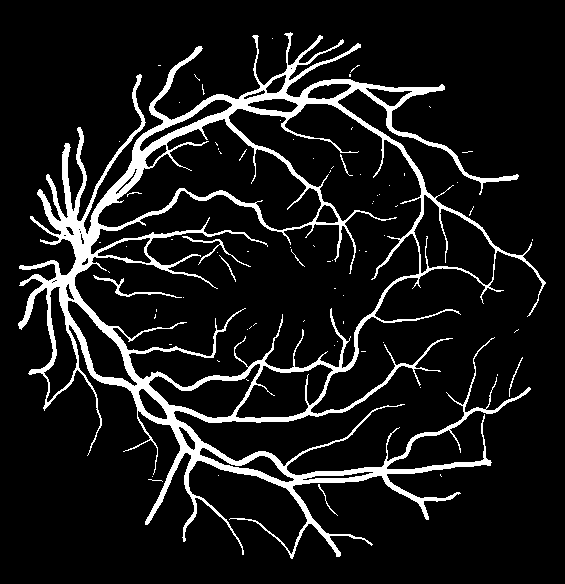

In [88]:
IMG.fromarray(image.u_1_100)

In [89]:
from sklearn.metrics import f1_score

In [90]:
image.u_1_1[image.u_1_1==255] = 1
image.u_1_100[image.u_1_100==255] = 1

In [91]:
f1_score(image.ground_truth, image.u_1_1, average='micro')

0.8296159597823667

In [92]:
from scipy.ndimage.morphology import distance_transform_edt

In [123]:
edt_orig = distance_transform_edt(image.u_1_1)
edt_orig[edt_orig>=2] = 0
edt = edt_orig/np.max(edt_orig) * 255

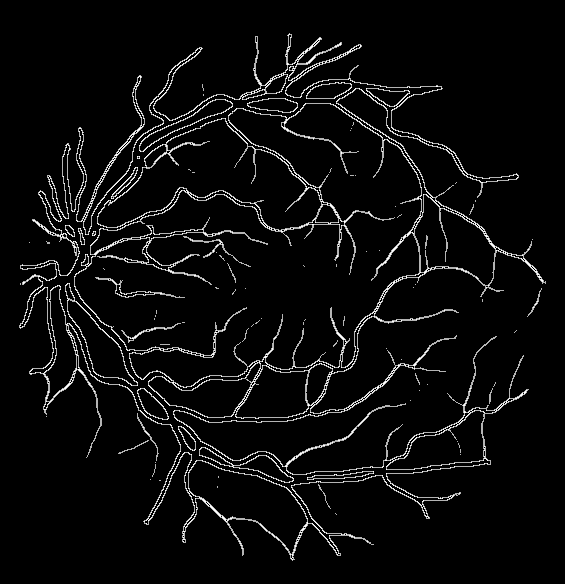

In [124]:
IMG.fromarray(np.array(edt, dtype=np.uint8))

In [126]:
np.unique(edt_orig, return_counts=True)

(array([0.        , 1.        , 1.41421356]),
 array([310293,  14912,   4755], dtype=int64))